## students grade

In [122]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

*Load the CSV*

In [123]:
'''
Load CSV
'''
df = pd.read_csv('student-por.csv')

Convert the periods grade into a final grade

In [124]:
average = df[['G1', 'G2', 'G3']].mean(axis=1).round().astype(int)
df['Grade'] = average
df = df.drop(columns=['G1', 'G2', 'G3'])

bins = [0, 9, 13, 15, 17, 20]
labels = [1, 2,3, 4, 5]
df['Grade'] = pd.cut(df['Grade'], bins=bins, labels=labels)



**1. Understand the data**

* .columns
* .head()
* .tail()
* .shape
*.dtypes
* .info()
* .describe()
* .isna()

In [125]:
'''
Inspect data
'''
display(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Grade'],
      dtype='object')

In [126]:
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,2


In [127]:
display(df.tail())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,2
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,3
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,2
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,2
648,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,4,2


ESTA ORDENANDO POR ESCOLA NAO PODE SER

In [128]:
display(df.shape)

(649, 31)

In [129]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    object  
 1   sex         649 non-null    object  
 2   age         649 non-null    int64   
 3   address     649 non-null    object  
 4   famsize     649 non-null    object  
 5   Pstatus     649 non-null    object  
 6   Medu        649 non-null    int64   
 7   Fedu        649 non-null    int64   
 8   Mjob        649 non-null    object  
 9   Fjob        649 non-null    object  
 10  reason      649 non-null    object  
 11  guardian    649 non-null    object  
 12  traveltime  649 non-null    int64   
 13  studytime   649 non-null    int64   
 14  failures    649 non-null    int64   
 15  schoolsup   649 non-null    object  
 16  famsup      649 non-null    object  
 17  paid        649 non-null    object  
 18  activities  649 non-null    object  
 19  nursery 

Many of the objects are boolean

In [130]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000


no outliers detected

No missing data

In [131]:
'''
Missing data
'''
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
Grade         False
dtype: bool

The dataset includes the following items:
- School: student's school (binary: 'GP' or 'MS') (change to binary)
- Sex : student's sex (binary: 'F' or 'M') (change to binary)
- Age: - student's age 
- Address: student residence rural or urban (binary: 'U' or 'R') (change to binary)
- Famsize: family size (binary: 'GT3 or 'LE3') (change to binary)
- Pstatus: parents cohabitation (binary: 'T' or 'A') (change to binary)
- Medu: mother's education (0-4)
- Fedu: father's education (0-4)
- Mjob: Mother job
- Fjob: Father job
- Reason: (home,reputation,course,other)
- Guardian: (mother,father,other)
- Traveltime: (1-4) time ranges
- Studytime:(1-4) time ranges
- Failures: past class failures (1-4) 1-3, 4=more than 3
- Schoolsup: extra educational support (binary: 'yes','no') (change to binary)
- Famsup: family education support (binary: 'yes','no') (change to binary)
- Paid: extra paid classes (binary: 'yes','no') (change to binary)
- Activities: extra activities (binary: 'yes','no') (change to binary)
- Nursery: attended nursery school (binary: 'yes','no') (change to binary)
- Higher: wants higher education (binary: 'yes','no') (change to binary)
- Internet: interner access @ home (binary: 'yes','no') (change to binary)
- Romantic: have a romantic relationship (binary: 'yes','no') (change to binary)
- Famrel: family relationship (1-5)
- Freetime: free time after school (1-5)
- Goout: goes out with friends (1-5)
- Dalc: consumes alcohol in workdays (1-5)
- Walc: consumes alcohol in weekend (1-5)
- Health: health status (1-5)
- Abscenes: school absences
- Grade: students grade (1-5)


**2. Data preparation and transformation**

- drop useless columns
- rename columns 
- handle missing values
- create new features
- handle wrong data types
- remove outliers

mudar colunas para binario e renomear

In [132]:
# original name: (new name,true,false)
renamingCols={
"school":("WentToGP","GP","MS"),
"sex":("IsMale","M","F"),
"address":("UrbanArea","U","R"),
"famsize":("FamilySizeBiggerThan3","GT3","LE3"),
"Pstatus":("ParentsLiveTogether","T","A"),
"schoolsup":("ExtraEducationalSupport","yes","no"),
"famsup":("FamilyEducationalSupport","yes","no"),
"paid":("PaidClasses","yes","no"),
"activities":("ExtraActivities","yes","no"),
"nursery":("HadNusrserySchool","yes","no"),
"higher":("WantHigherEducation","yes","no"),
"internet":("InternetAtHome","yes","no"),
"romantic":("RomanticRelationship","yes","no")
}

for col,data in renamingCols.items():
    df[data[0]] = df[col].replace({data[1]: 1,data[2]: 0}).astype(bool)
    # Optionally, drop the original column 'OriginalColumn' if needed
    df = df.drop(columns=[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       649 non-null    int64   
 1   Medu                      649 non-null    int64   
 2   Fedu                      649 non-null    int64   
 3   Mjob                      649 non-null    object  
 4   Fjob                      649 non-null    object  
 5   reason                    649 non-null    object  
 6   guardian                  649 non-null    object  
 7   traveltime                649 non-null    int64   
 8   studytime                 649 non-null    int64   
 9   failures                  649 non-null    int64   
 10  famrel                    649 non-null    int64   
 11  freetime                  649 non-null    int64   
 12  goout                     649 non-null    int64   
 13  Dalc                      649 non-null    int64   

convert to categorical

In [133]:
for i in ['Mjob','Fjob','reason','guardian']:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       649 non-null    int64   
 1   Medu                      649 non-null    int64   
 2   Fedu                      649 non-null    int64   
 3   Mjob                      649 non-null    category
 4   Fjob                      649 non-null    category
 5   reason                    649 non-null    category
 6   guardian                  649 non-null    category
 7   traveltime                649 non-null    int64   
 8   studytime                 649 non-null    int64   
 9   failures                  649 non-null    int64   
 10  famrel                    649 non-null    int64   
 11  freetime                  649 non-null    int64   
 12  goout                     649 non-null    int64   
 13  Dalc                      649 non-null    int64   

**2. Univariate analysis**

Iterate through each and every relevant variable and get basic information such as

- .hist()
- .value_counts()
- .skew()
- .kurt()

age


count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

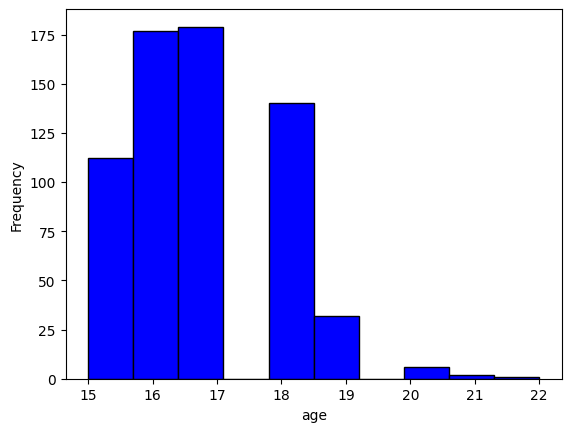

Skew: 0.4167953798111204
Kurtosis: 0.07150858494933487
Medu


count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

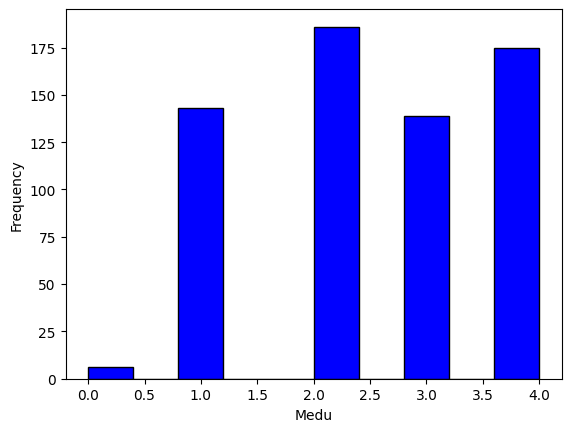

Skew: -0.029950358081110445
Kurtosis: -1.2606193193690842
Fedu


count    649.000000
mean       2.306626
std        1.099931
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

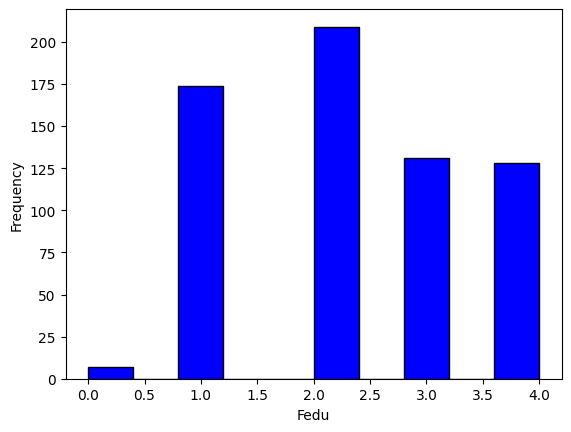

Skew: 0.21534336325478984
Kurtosis: -1.1092413844724942
traveltime


count    649.000000
mean       1.568567
std        0.748660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

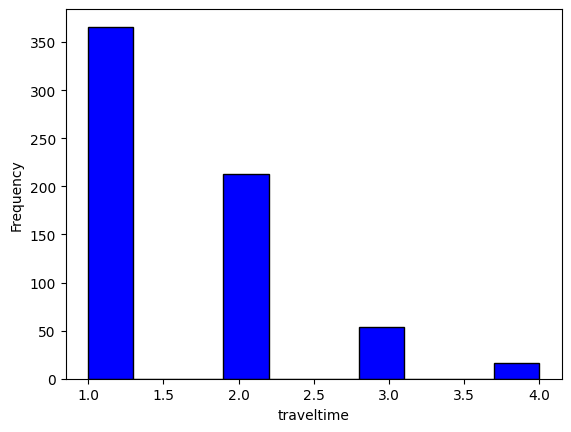

Skew: 1.2476475492990087
Kurtosis: 1.1088649540584097
studytime


count    649.000000
mean       1.930663
std        0.829510
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

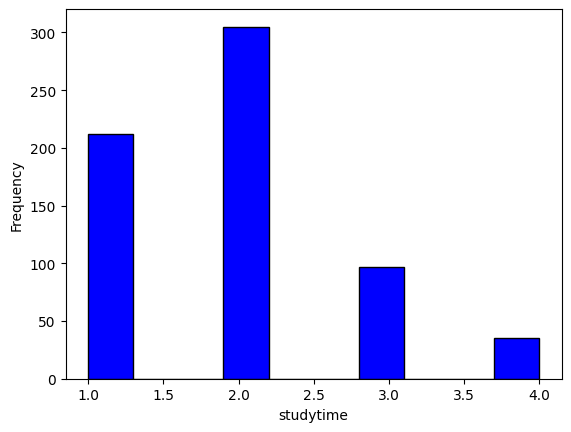

Skew: 0.6996192054467889
Kurtosis: 0.03784612702530943
failures


count    649.000000
mean       0.221880
std        0.593235
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

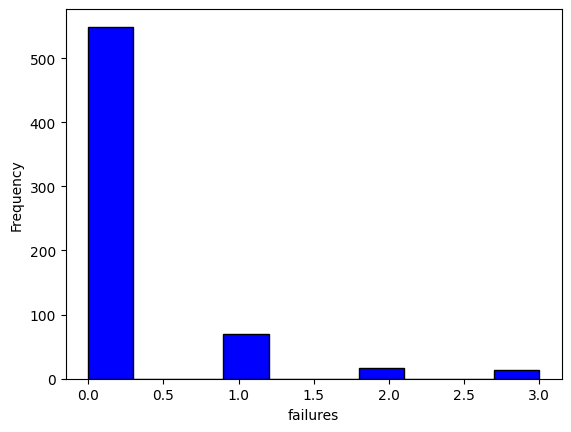

Skew: 3.092698960847477
Kurtosis: 9.824408582632877
famrel


count    649.000000
mean       3.930663
std        0.955717
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

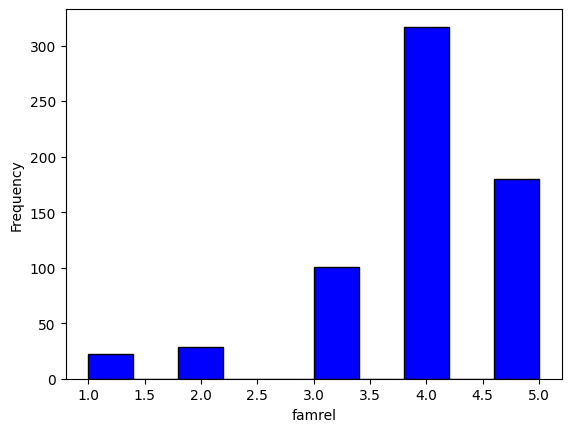

Skew: -1.1059340909420583
Kurtosis: 1.3489725829219301
freetime


count    649.000000
mean       3.180277
std        1.051093
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

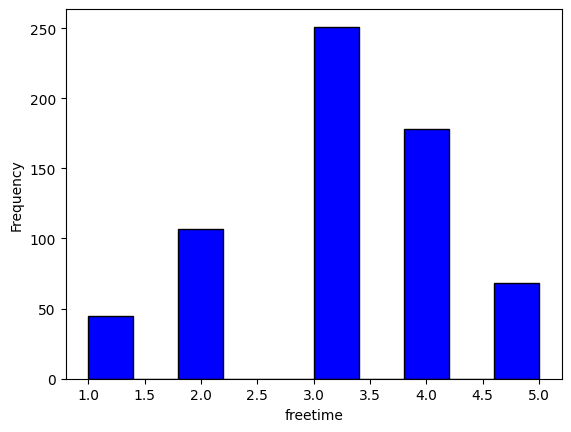

Skew: -0.1812774790934117
Kurtosis: -0.3969588251952243
goout


count    649.000000
mean       3.184900
std        1.175766
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

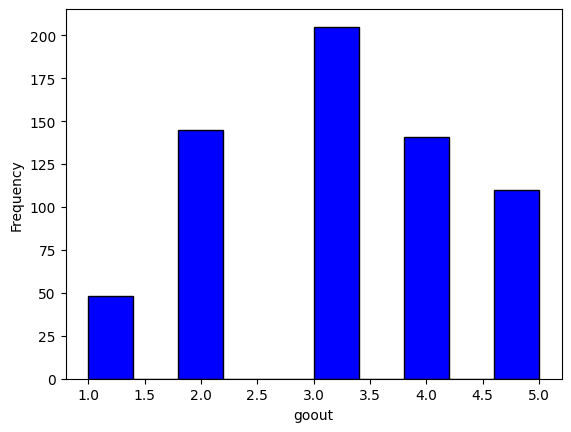

Skew: -0.008579903539792107
Kurtosis: -0.8654537522799943
Dalc


count    649.000000
mean       1.502311
std        0.924834
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Dalc, dtype: float64

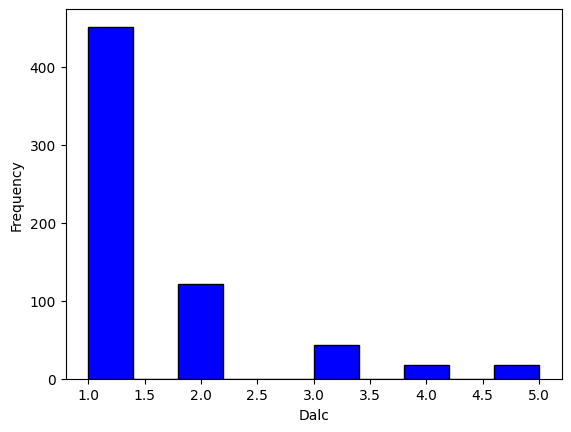

Skew: 2.141913360367646
Kurtosis: 4.3492974717455715
Walc


count    649.000000
mean       2.280431
std        1.284380
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Walc, dtype: float64

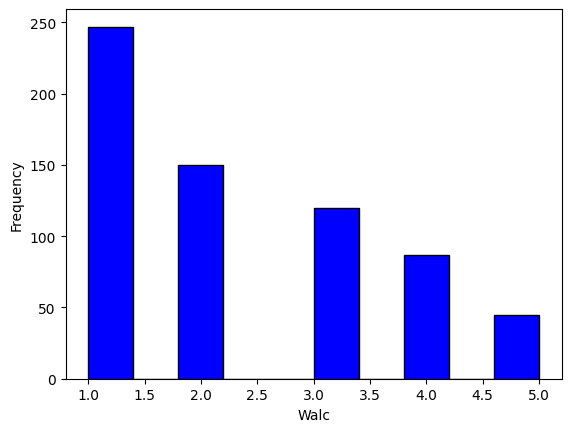

Skew: 0.6359042701186859
Kurtosis: -0.7706892185419245
health


count    649.000000
mean       3.536210
std        1.446259
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

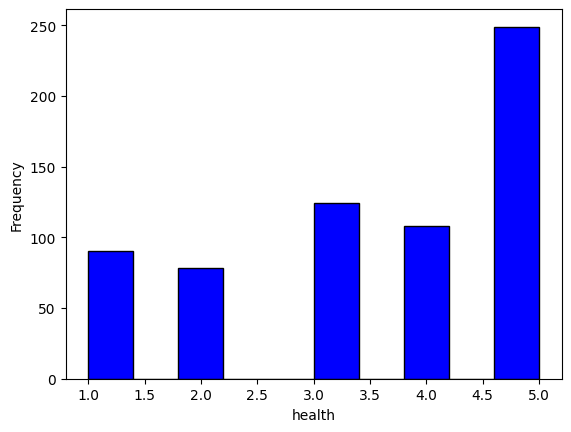

Skew: -0.5006561886039521
Kurtosis: -1.121175092029219
absences


count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

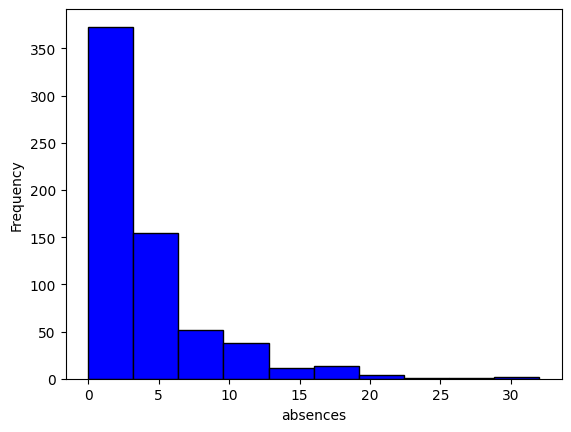

Skew: 2.020693704014018
Kurtosis: 5.781077639181336


In [134]:
int64_columns = df.select_dtypes(include=['int64'])
for column in int64_columns.columns:
    print(column)
    display(int64_columns[column].describe())
    plt.hist(int64_columns[column], bins=10, color='blue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print("Skew:", int64_columns[column].skew())
    print("Kurtosis:", int64_columns[column].kurtosis())

categorical variavels

Mjob


count       649
unique        5
top       other
freq        258
Name: Mjob, dtype: object

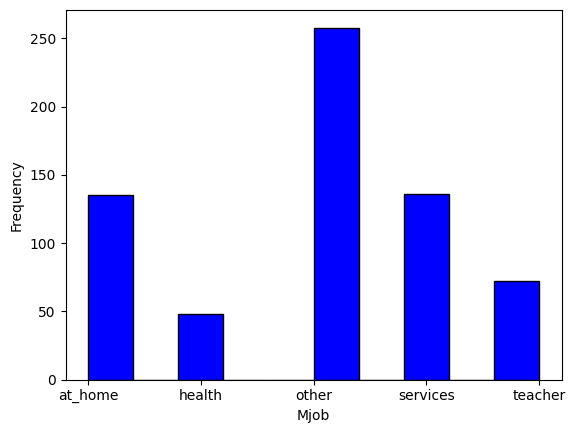

Fjob


count       649
unique        5
top       other
freq        367
Name: Fjob, dtype: object

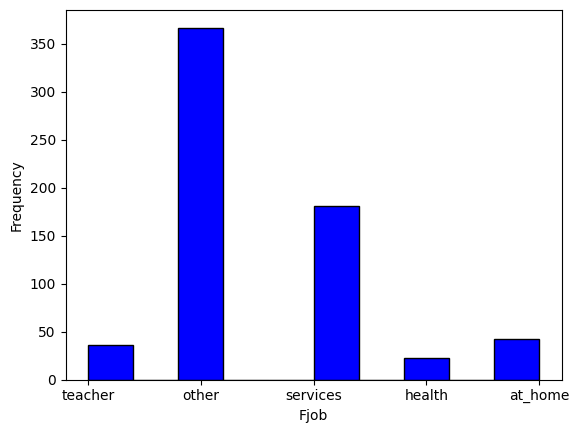

reason


count        649
unique         4
top       course
freq         285
Name: reason, dtype: object

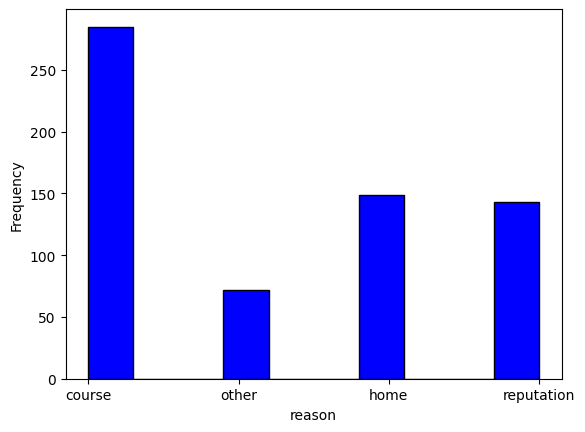

guardian


count        649
unique         3
top       mother
freq         455
Name: guardian, dtype: object

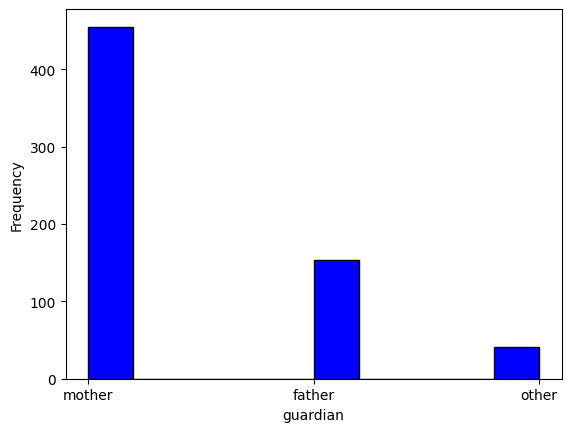

Grade


count     649
unique      5
top         2
freq      359
Name: Grade, dtype: int64

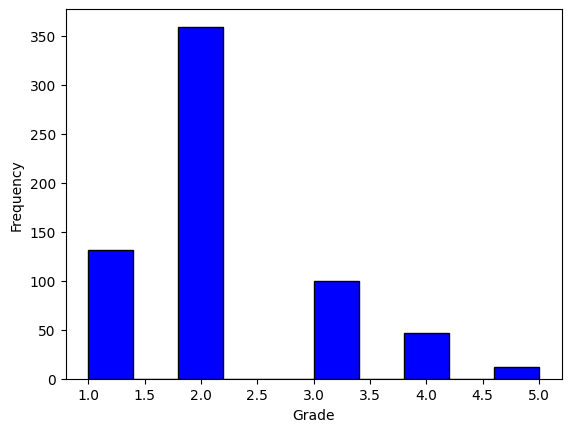

In [135]:
category_columns = df.select_dtypes(include=['category'])
for column in category_columns.columns:
    print(column)
    display(category_columns[column].describe())
    plt.hist(category_columns[column], bins=10, color='blue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

**3. Multivariate analysis**

- grouping
- bins
- statistical dispersion: histogram, box plots, scatter plots, pair plots, correlation matrixes

> scatterplots: plot 2 variables against each other and understand how they move together

> pairplots: plot all variables against each other and understand how they move together

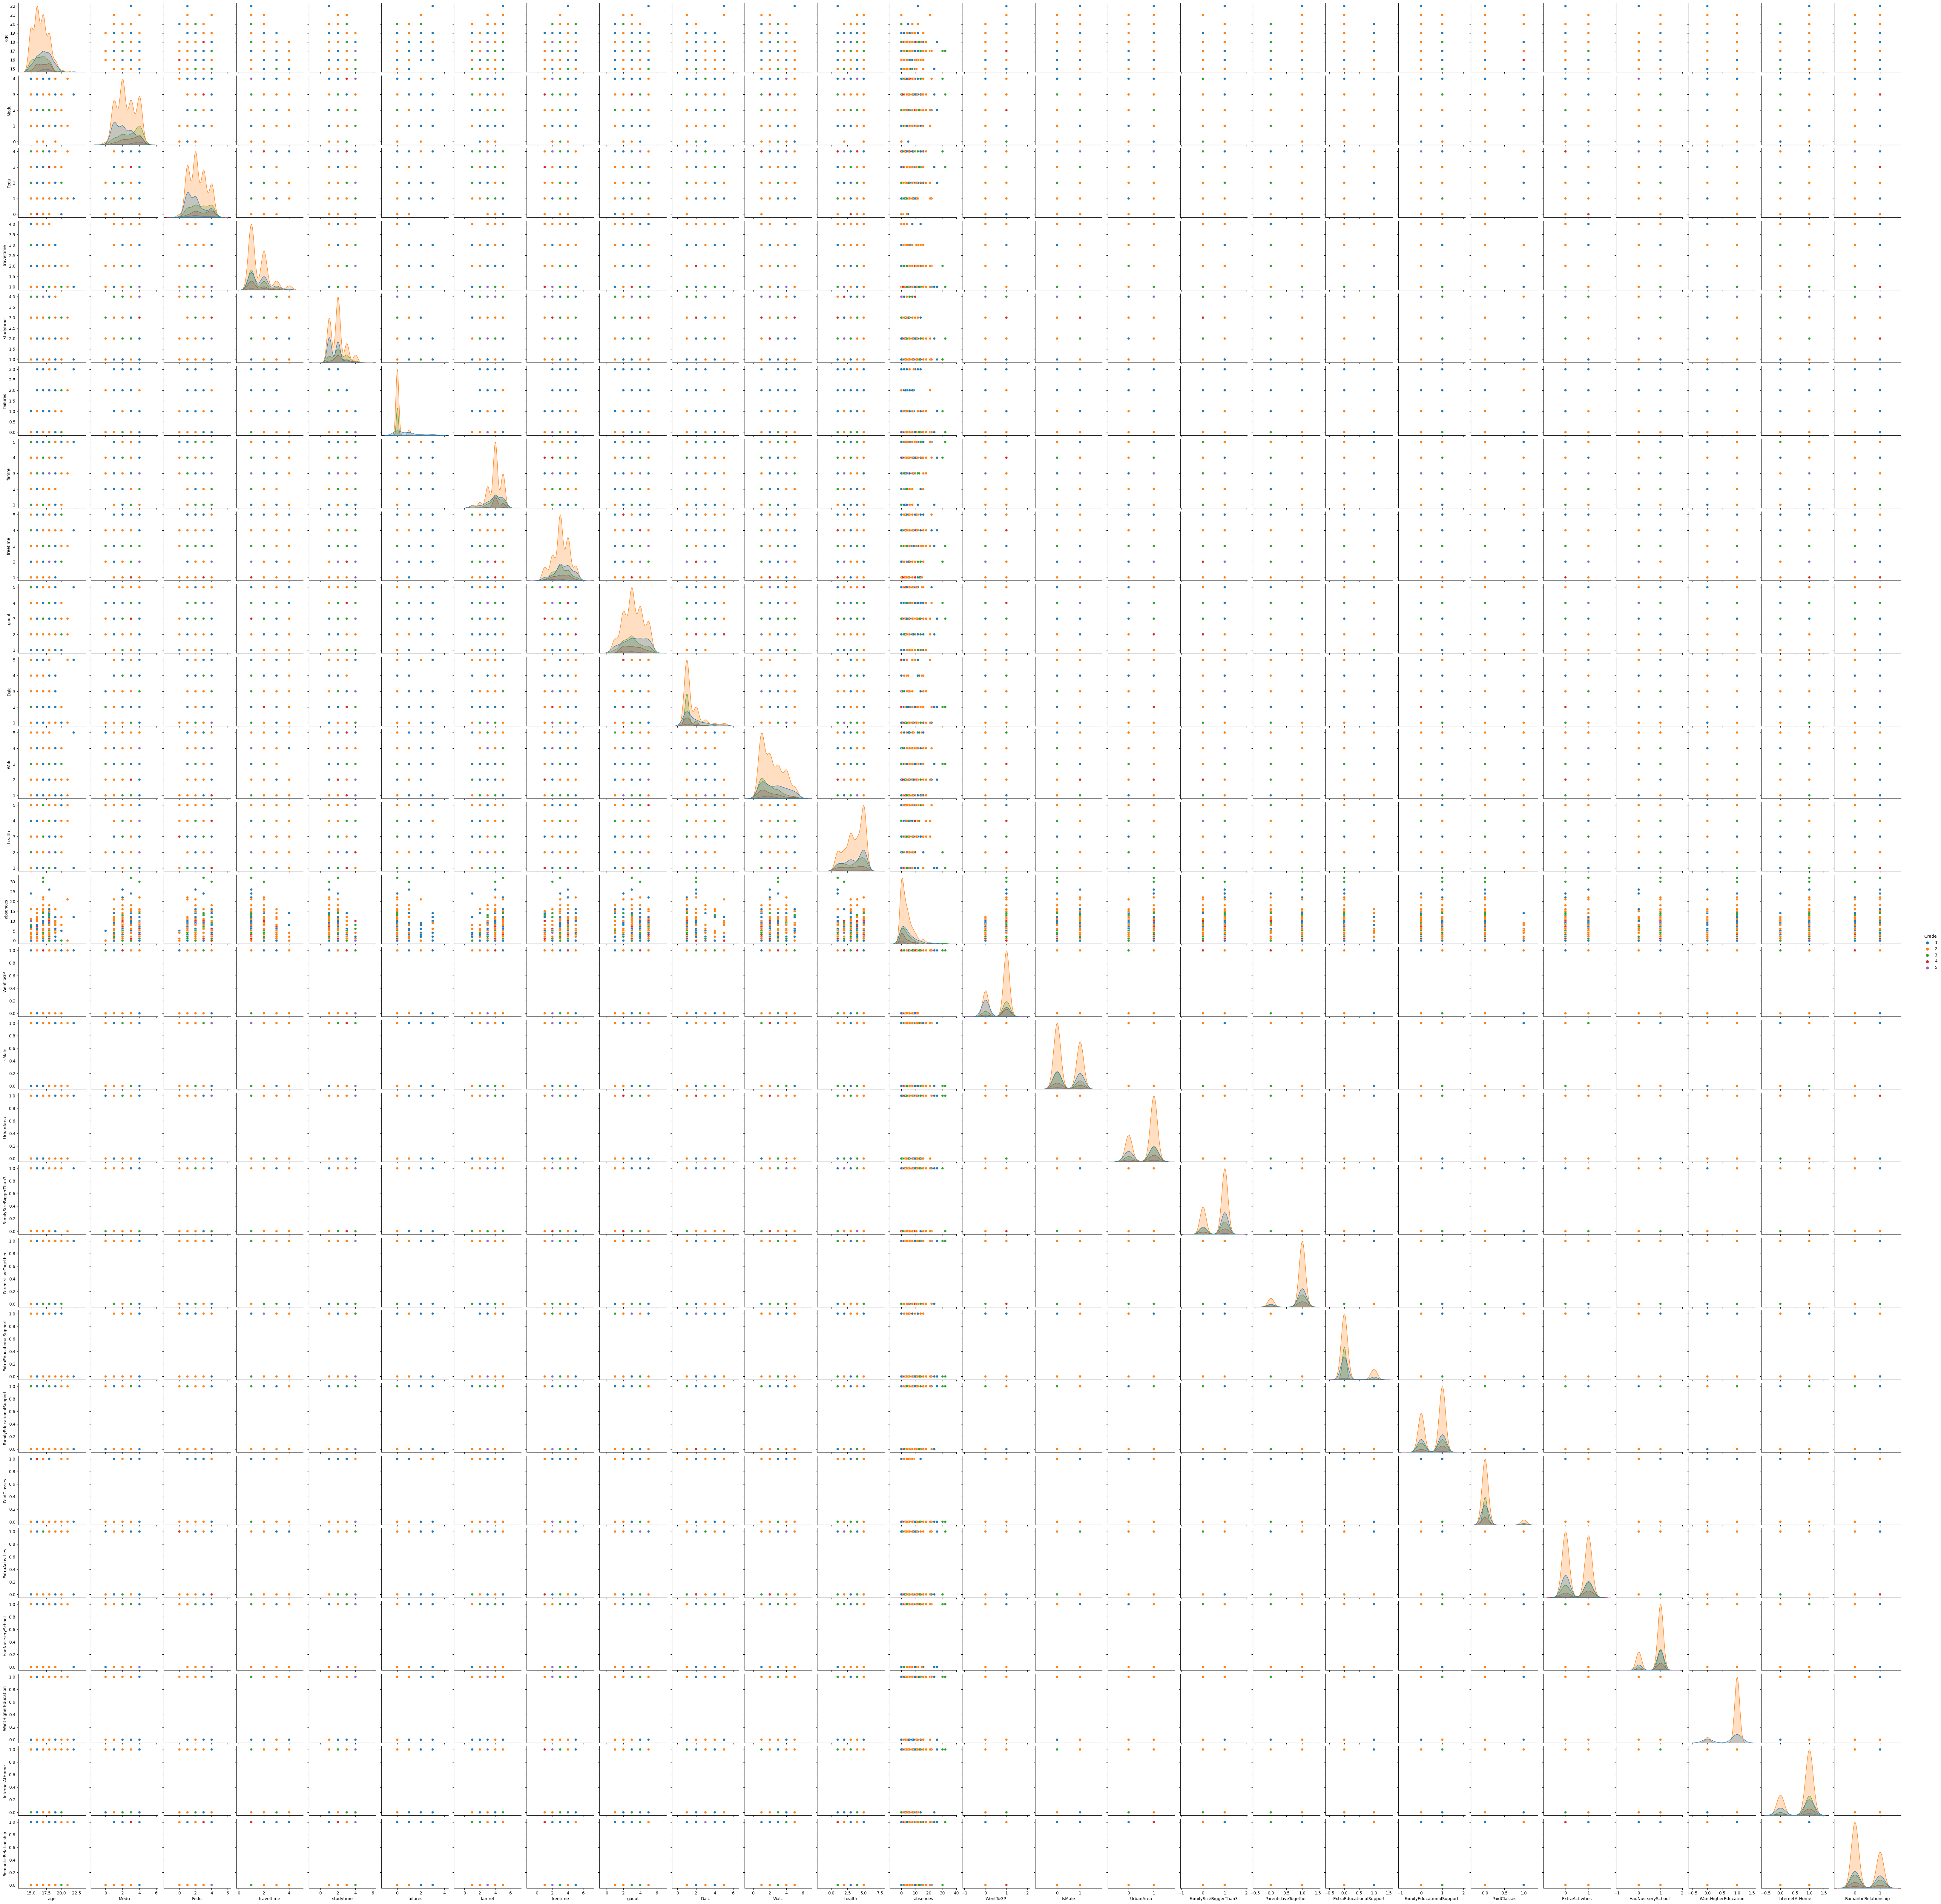

In [136]:
'''
All variables
'''
sns.pairplot(df, hue="Grade")

In [137]:
'''
Grouping
'''
df.groupby(by=['Grade']).mean(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,FamilySizeBiggerThan3,ParentsLiveTogether,ExtraEducationalSupport,FamilyEducationalSupport,PaidClasses,ExtraActivities,HadNusrserySchool,WantHigherEducation,InternetAtHome,RomanticRelationship
Grade,,,,,,,,,,,,,,,,,,,,,
1,17.122137,2.137405,1.984733,1.671756,1.587786,0.755725,3.793893,3.412214,3.297710,1.763359,...,0.748092,0.870229,0.106870,0.580153,0.068702,0.419847,0.786260,0.687023,0.679389,0.427481
2,16.618384,2.448468,2.281337,1.593315,1.924791,0.116992,3.941504,3.119777,3.194986,1.520891,...,0.704735,0.883008,0.139276,0.626741,0.072423,0.484680,0.782730,0.922006,0.763231,0.353760
3,16.570000,2.900000,2.590000,1.440000,2.170000,0.030000,3.980000,3.160000,3.080000,1.200000,...,0.650000,0.850000,0.030000,0.580000,0.020000,0.550000,0.890000,1.000000,0.860000,0.380000
4,16.893617,3.021277,2.765957,1.382979,2.255319,0.000000,4.191489,3.148936,3.127660,1.319149,...,0.702128,0.872340,0.000000,0.680851,0.042553,0.595745,0.851064,1.000000,0.808511,0.340426
5,17.250000,3.416667,2.416667,1.500000,2.583333,0.000000,3.666667,2.750000,2.750000,1.333333,...,0.666667,1.000000,0.083333,0.583333,0.000000,0.250000,0.666667,1.000000,0.916667,0.166667


Daqui podemos tirar algumas conclusoes:
- A idade não afeta muito as notas
- quanto maior for o nivel de educação dos pais melhor sao as notas
- O tempo de viajem não afeta muito as notas
- Quanto maior o tempo de estudo melhor sao as notas
- Quanto maior o numero de reprovações menor as notas
- Quanto menos sair com amigos melhor são as notas até certo ponto nao sendo um fator muito decisivo
- Quanto menos tempo livre depois das aulas melhor as notas até certo pon´to nao sendo um fator muito decisivo
- O tamanho da familia não é um fator que afeta muito as notas.
- Os pais cohabitirem não afeta as notas
- Quem tem mais apoio na escola é quem tem piores notas
- Apoio familiar nos estudos não afeta as notas 
- Não existe uma grande relação entre notas e apoio pago mas quem tem menores notas é ligeiramente quem mais o tem.
- Quanto mais atividades fora de aulas maiores as notas exepto quem tem 18-20
- Quem andou no infantario tem maiores notas exepto quem tem 18-20
- Quem não quer ir para o ensino superior é quem tem as piores notas.
- Quem tem internet em casa tem melhores notas
- Quem não tem relações amorosas tem as melhores notas

In [138]:
df.groupby(by=['Grade','studytime']).agg(pd.Series.mode)

age       Medu       Fedu  \
Grade studytime                                       
1     1                    17          1          1   
      2                    18          1          1   
      3                    17     [1, 3]          2   
      4              [17, 18]     [2, 4]     [2, 4]   
2     1                    16          2          2   
      2                    16          2          2   
      3              [16, 17]          2          2   
      4                    15          2          2   
3     1                    16          4          4   
      2                    17          4          3   
      3                    17          4          2   
      4              [15, 18]     [2, 3]          2   
4     1                    16          4          4   
      2          [16, 17, 18]          4          2   
      3                    18          4          4   
      4                    18          4          3   
5     1              [15, 18]          4     [2, 4]   
      2              [17, 18]          4     [2, 4]   
      3                    18  [1, 2, 4]  [1, 2, 3]   
      4                    17          3          2   

                                                              Mjob  \
Grade studytime                                                      
1     1                                                      other   
      2          ['at_home', 'other']
Categories (5, object): [...   
      3                                                      other   
      4          ['at_home', 'services']
Categories (5, object)...   
2     1                                                      other   
      2                                                      other   
      3                                                      other   
      4                                                      other   
3     1                                                      other   
      2                                                      other   
      3                                                      other   
      4                                                      other   
4     1          ['other', 'services']
Categories (5, object): ...   
      2                                                      other   
      3          ['other', 'teacher']
Categories (5, object): [...   
      4                                                      other   
5     1                                                    teacher   
      2          ['other', 'teacher']
Categories (5, object): [...   
      3                                                    at_home   
      4          ['health', 'services', 'teacher']
Categories (...   

                                                              Fjob  \
Grade studytime                                                      
1     1                                                      other   
      2                                                      other   
      3                                                   services   
      4          ['health', 'services']
Categories (5, object):...   
2     1                                                      other   
      2                                                      other   
      3                                                      other   
      4                                                      other   
3     1                                                      other   
      2                                                      other   
      3                                                      other   
      4                                                      other   
4     1                                                      other   
      2                                                      other   
      3                                                   services   
      4          ['other', 'services']
Categories (5, object): ...   
5     1       

In [139]:
df.groupby(by=['Grade','famrel']).mean(numeric_only=True)

age      Medu      Fedu  traveltime  studytime  failures  \
Grade famrel                                                                   
1     1       16.888889  1.666667  1.777778    1.555556   2.111111  0.555556   
      2       17.333333  1.666667  1.777778    1.444444   1.444444  1.111111   
      3       17.130435  2.260870  2.086957    1.695652   1.608696  1.000000   
      4       17.142857  2.244898  2.183673    1.673469   1.510204  0.673469   
      5       17.097561  2.146341  1.780488    1.731707   1.585366  0.682927   
2     1       16.875000  2.500000  2.000000    2.125000   2.750000  0.000000   
      2       16.687500  3.000000  2.687500    1.687500   1.812500  0.125000   
      3       16.694915  2.474576  2.305085    1.576271   1.813559  0.203390   
      4       16.626374  2.346154  2.181319    1.565934   1.950549  0.093407   
      5       16.521277  2.531915  2.414894    1.595745   1.893617  0.117021   
3     1       16.000000  3.500000  2.750000    1.500000   1.750000  0.000000   
      2       16.666667  3.000000  2.666667    1.333333   2.666667  0.000000   
      3       16.500000  2.500000  2.571429    1.285714   1.928571  0.000000   
      4       16.591837  2.775510  2.448980    1.530612   2.244898  0.020408   
      5       16.633333  3.200000  2.800000    1.366667   2.166667  0.066667   
4     1             NaN       NaN       NaN         NaN        NaN       NaN   
      2       16.000000  4.000000  4.000000    1.000000   2.000000  0.000000   
      3       17.000000  2.000000  1.500000    1.000000   2.500000  0.000000   
      4       16.838710  3.129032  2.806452    1.354839   2.225806  0.000000   
      5       17.076923  2.846154  2.769231    1.538462   2.307692  0.000000   
5     1       18.000000  4.000000  4.000000    1.000000   1.000000  0.000000   
      2             NaN       NaN       NaN         NaN        NaN       NaN   
      3       16.666667  3.666667  2.333333    1.333333   2.333333  0.000000   
      4       17.333333  3.666667  2.500000    1.666667   2.666667  0.000000   
      5       17.500000  2.000000  1.500000    1.500000   3.500000  0.000000   

              freetime     goout      Dalc      Walc  ...  \
Grade famrel                                          ...   
1     1       2.777778  2.777778  1.777778  2.111111  ...   
      2       3.333333  3.333333  1.777778  3.111111  ...   
      3       2.869565  3.000000  1.565217  2.434783  ...   
      4       3.489796  3.285714  1.755102  2.632653  ...   
      5       3.780488  3.585366  1.878049  2.585366  ...   
2     1       2.500000  3.000000  2.250000  2.750000  ...   
      2       3.187500  3.437500  1.812500  2.500000  ...   
      3       2.932203  3.135593  1.491525  2.508475  ...   
      4       3.192308  3.137363  1.516484  2.280220  ...   
      5       3.138298  3.319149  1.436170  2.159574  ...   
3     1       3.000000  2.000000  1.500000  2.500000  ...   
      2       3.333333  3.333333  1.000000  2.000000  ...   
      3       2.428571  2.571429  1.357143  2.571429  ...   
      4       3.163265  3.204082  1.142857  1.877551  ...   
      5       3.500000  3.233333  1.200000  1.800000  ...   
4     1            NaN       NaN       NaN       NaN  ...   
      2       4.000000  4.000000  2.000000  3.000000  ...   
      3       4.500000  2.500000  2.000000  2.500000  ...   
      4       2.935484  3.161290  1.322581  2.064516  ...   
      5       3.384615  3.076923  1.153846  1.615385  ...   
5     1       4.000000  2.000000  2.000000  2.000000  ...   
      2            NaN       NaN       NaN       NaN  ...   
      3       2.666667  2.666667  1.000000  2.000000  ...   
      4       2.666667  3.166667  1.500000  2.000000  ...   
      5       2.500000  2.000000  1.000000  1.500000  ...   

              FamilySizeBiggerThan3  ParentsLiveTogether  \
Grade famrel                                               
1     1                    0.666667             0.777778   
      2                    0.44

Quem tem os pais a viver juntos por norma tem uma melhor relação com a familia

<AxesSubplot:ylabel='absences'>

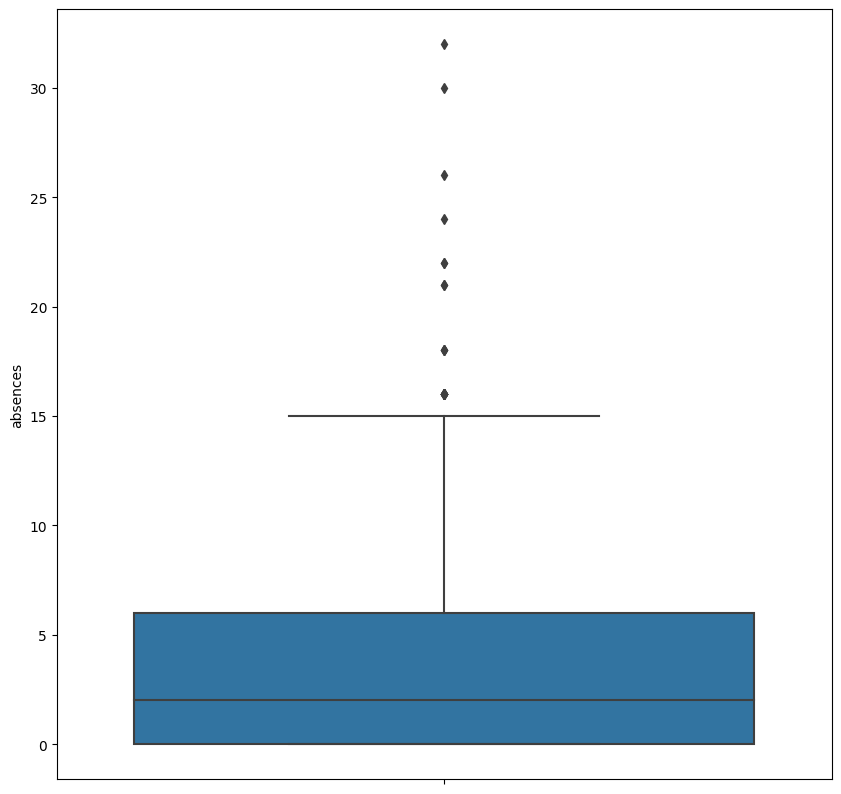

In [140]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y=df['absences'], ax=ax)

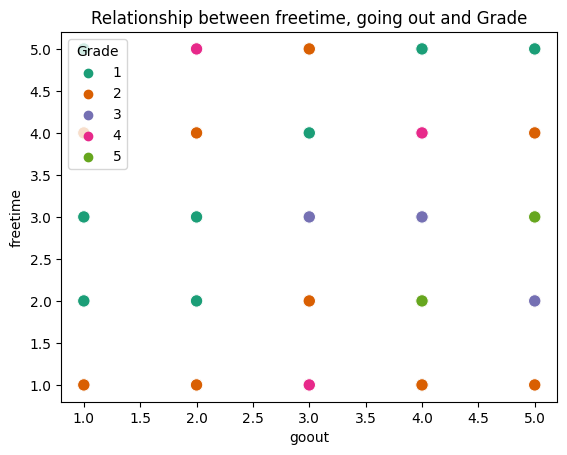

In [141]:
'''
Scatter plots
'''
sns.scatterplot(x="goout", y="freetime", hue="Grade", data=df,palette="Dark2",s=80)
plt.title("Relationship between freetime, going out and Grade")
plt.show()

this shows that the best students still go out even tho not having much time, most likely is due to this students having the best time management skills so they study more outside their free time

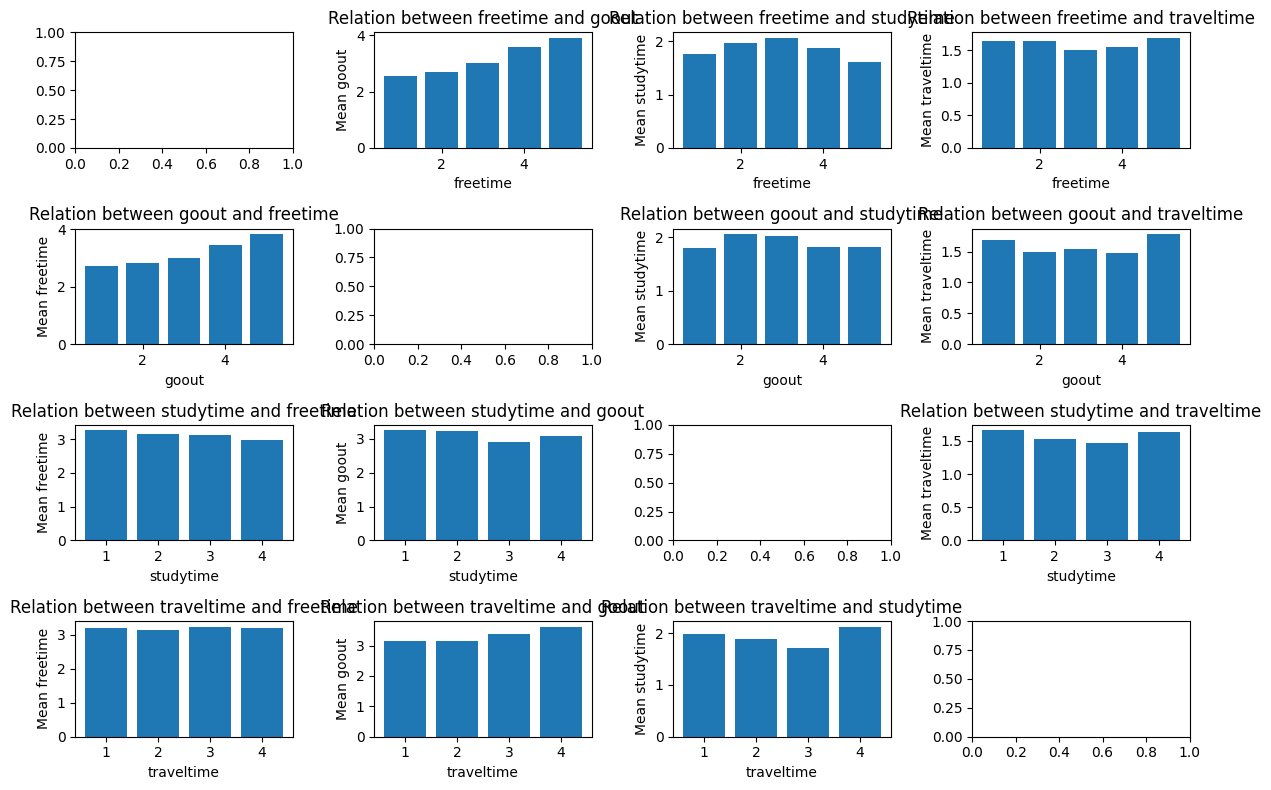

In [142]:
'''
Relations
'''
cols = ['freetime', 'goout', 'studytime', 'traveltime']
# Create a single image with all bar plots
fig, axes = plt.subplots(nrows=len(cols), ncols=len(cols), figsize=(12, 8))

for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        if col1 != col2:
            # Group by the values of col1 and calculate the mean of col2
            grouped = df.groupby(col1)[col2].mean().reset_index()

            # Create a bar plot in the subplot
            ax = axes[i, j]
            ax.bar(grouped[col1], grouped[col2])
            ax.set_xlabel(col1)
            ax.set_ylabel(f'Mean {col2}')
            ax.set_title(f'Relation between {col1} and {col2}')

# Adjust layout
plt.tight_layout()

# Save or display the final image
plt.show()


We can clearly see people who have more free time go out more

<AxesSubplot:>

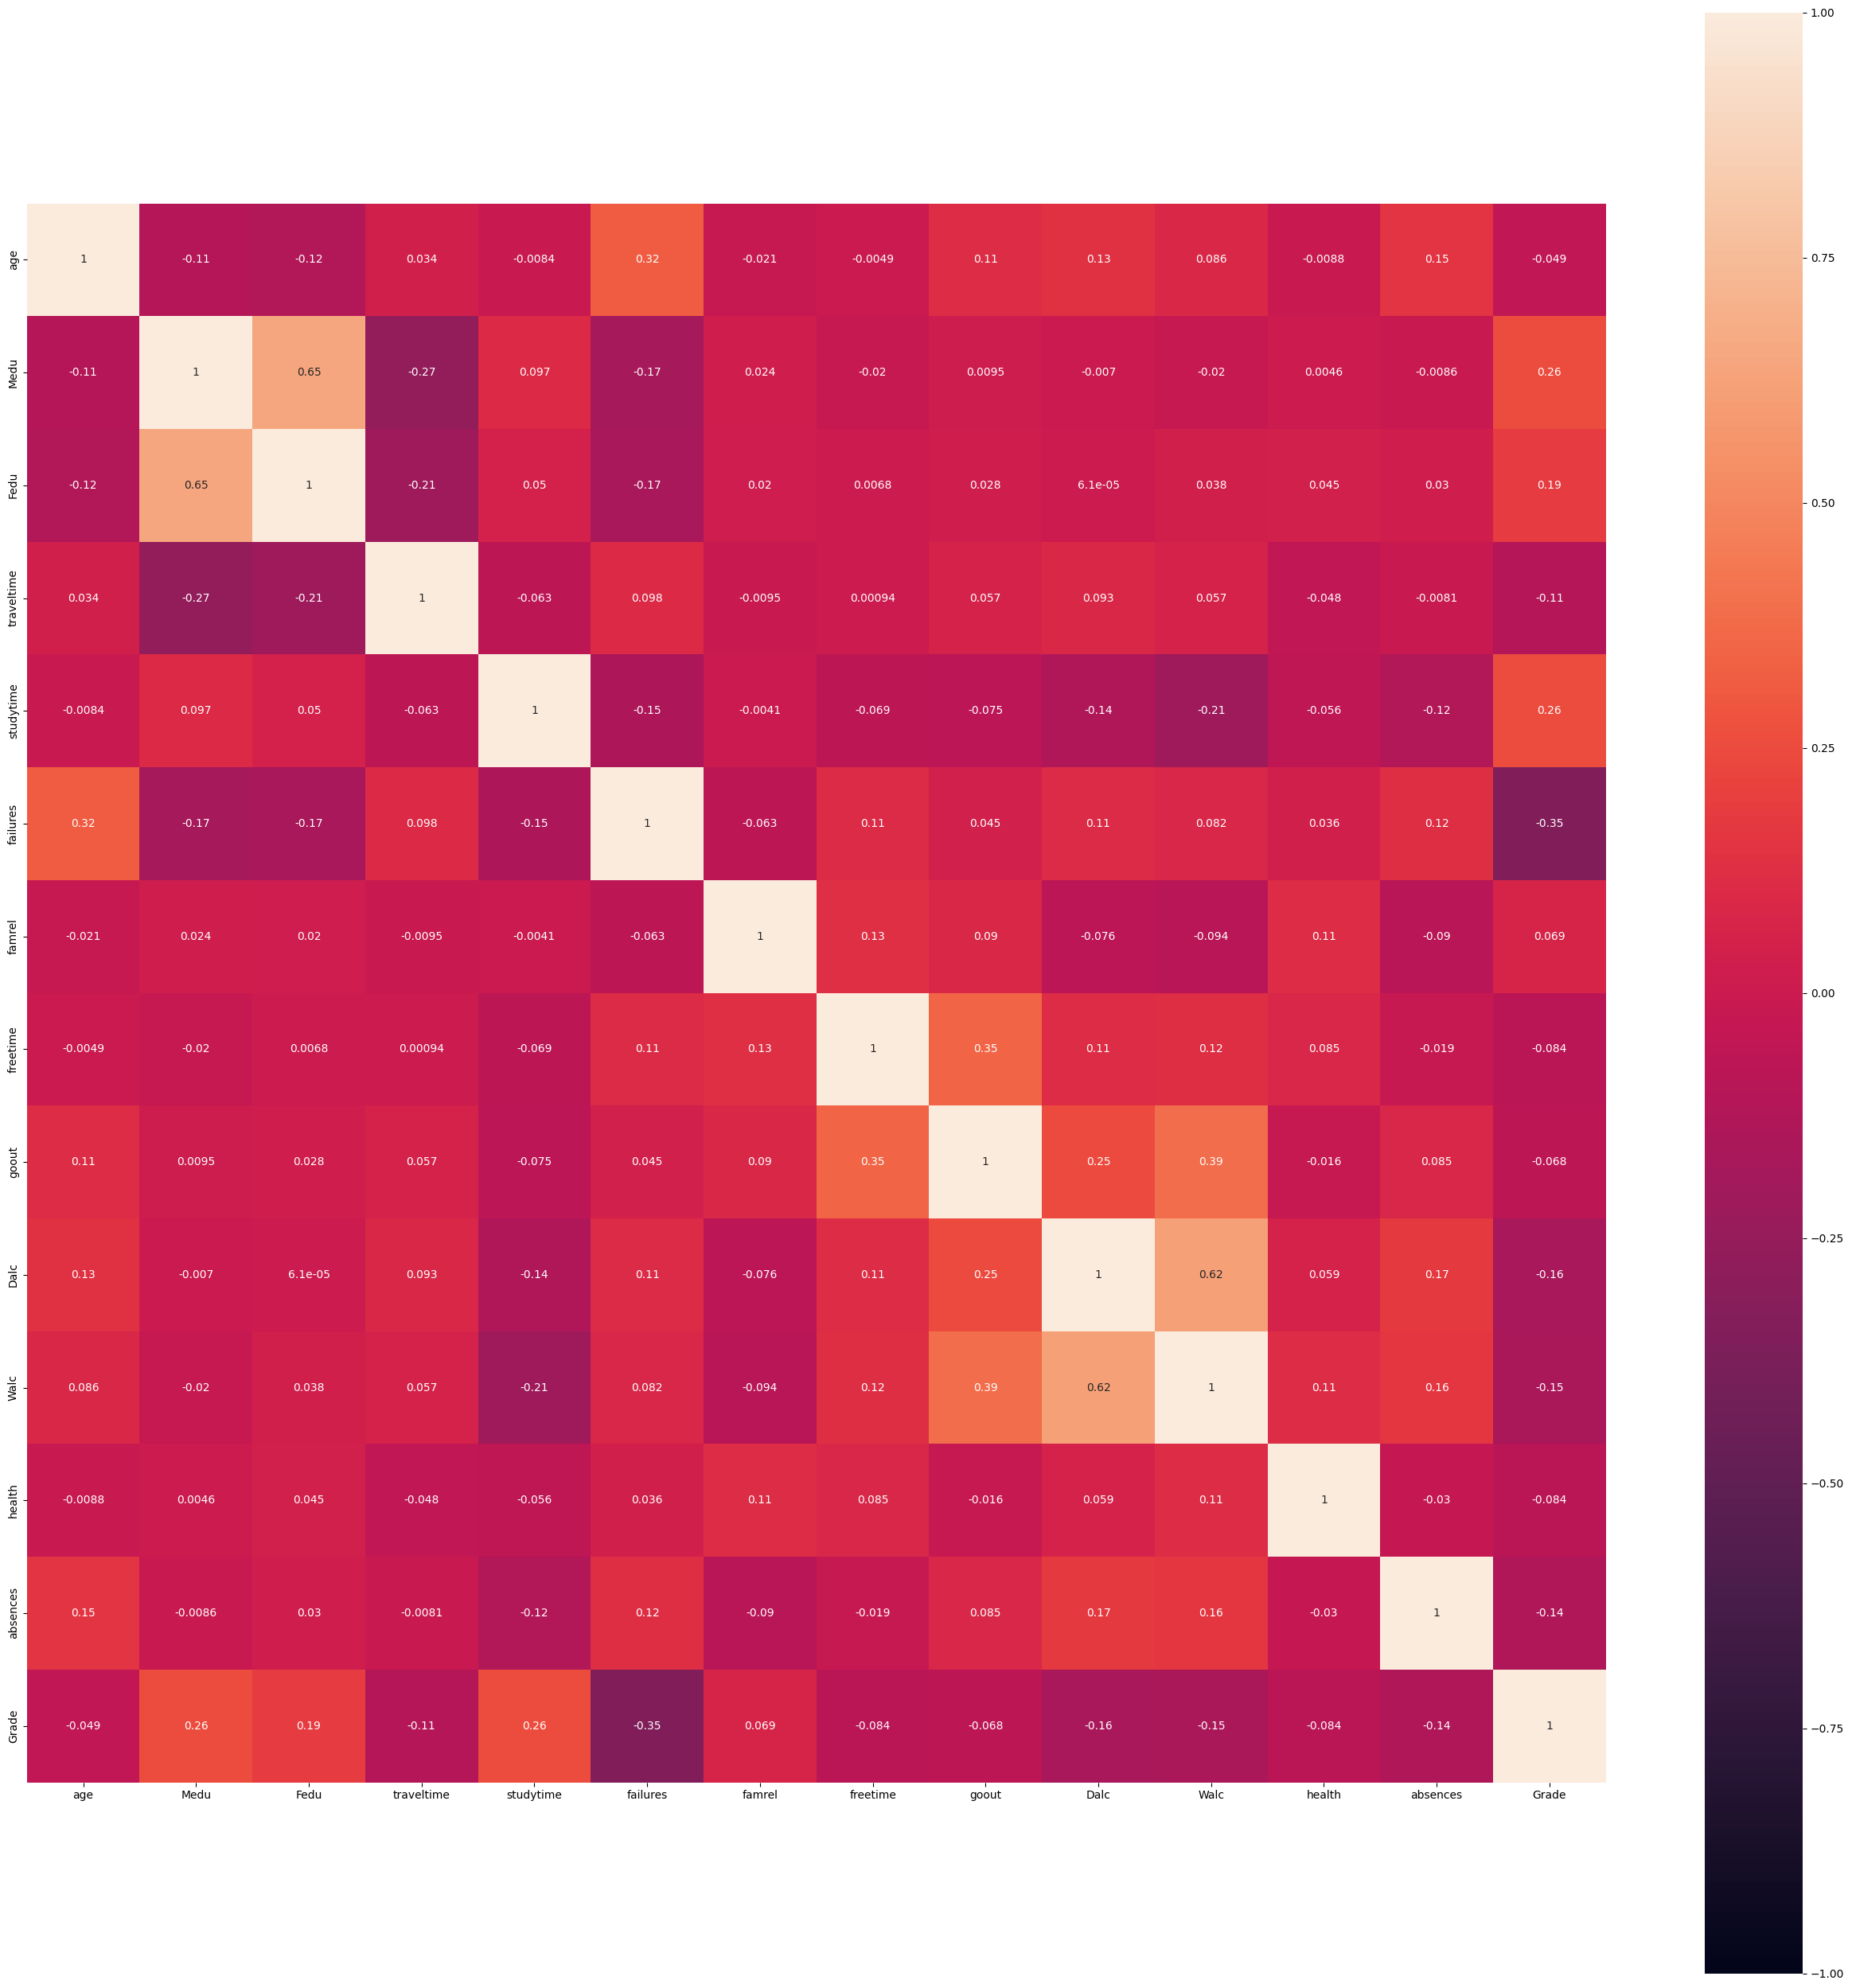

In [143]:
'''
Correlation
'''
selected_columns = df.select_dtypes(include=['int64']).join(df[['Grade']])

corr_matrix = selected_columns.corr(numeric_only=False)
f, ax = plt.subplots(figsize=(32, 32))
sns.heatmap(corr_matrix, vmin=-1, square=True, annot=True)

High correlation between Mother and Father education, also the consumption of alcooh in week days and weekends

Shuffle data before training

In [144]:
df_shuffled = df.sample(frac=1, random_state=25)

Liner regression

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

folds=10

In [150]:
X = df_shuffled.drop(['Grade','Fedu','Walc'], axis=1).select_dtypes(include=['int64','bool'])  
y = df_shuffled['Grade']

# Create a KFold cross-validation object
kf = KFold(n_splits=folds, shuffle=True, random_state=25)
# Create a Linear Regression model
model = LinearRegression()
# Lists to store R-squared scores for each fold
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the R-squared score for this fold
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Calculate the mean R-squared score across all folds
mean_r2 = sum(r2_scores) / folds
print(f"Mean R-squared score: {mean_r2}")

Mean R-squared score: 0.2153058159485365


First of all we tried not removing columns
after we removed the ones which have high correlation with other but had the lowest with grade.
then tried removing columns with low correlation with grade (no effect)
hyperparameters